### Citation
1. Martin, R. A., (2021). PyPortfolioOpt: portfolio optimization in Python. Journal of Open Source Software, 6(61), 3066, https://doi.org/10.21105/joss.03066
2. ssantoshp/Empyrial: An Open Source Portfolio Backtesting Engine for Everyone  (n.d.). GitHub. https://github.com/ssantoshp/Empyrial

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pypfopt

In [2]:
idf=pd.read_csv("C:\\Users\\11541\\Desktop\\GCAEF Report\\Delete.csv")

In [3]:
idf.head()

,Date,ANA.MC,ALFA.ST,BALL.K,BAYGn.DE,BIOX.PA,BXB.AX,CEMEXCPO.MX,CNR.TO,CNHI.K,...,SEDG.O,SSE.L,6762.T,TOM.OL,TT,UPMEUR.xbo,VIE.PA,VWS.CO,WSP.TO,XYL
0,2019/1/7,77.14,NaN,NaN,NaN,58.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.4515,NaN,NaN,NaN
1,2019/1/8,78.24,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.5961,NaN,NaN,NaN
2,2019/1/9,77.64,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0851,NaN,NaN,NaN
3,2019/1/10,78.74,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0803,NaN,NaN,NaN
4,2019/1/11,79.08,NaN,NaN,NaN,58.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.1671,NaN,NaN,NaN


In [4]:
prices=idf

In [5]:
prices.set_index("Date", inplace=True)

In [6]:
prices.head()

,ANA.MC,ALFA.ST,BALL.K,BAYGn.DE,BIOX.PA,BXB.AX,CEMEXCPO.MX,CNR.TO,CNHI.K,SGOB.PA,...,SEDG.O,SSE.L,6762.T,TOM.OL,TT,UPMEUR.xbo,VIE.PA,VWS.CO,WSP.TO,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2019/1/7,77.14,NaN,NaN,NaN,58.6,NaN,NaN,NaN,NaN,29.84,...,NaN,NaN,NaN,NaN,NaN,NaN,17.4515,NaN,NaN,NaN
2019/1/8,78.24,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,29.60,...,NaN,NaN,NaN,NaN,NaN,NaN,17.5961,NaN,NaN,NaN
2019/1/9,77.64,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,28.89,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0851,NaN,NaN,NaN
2019/1/10,78.74,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,28.77,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0803,NaN,NaN,NaN
2019/1/11,79.08,NaN,NaN,NaN,58.5,NaN,NaN,NaN,NaN,28.81,...,NaN,NaN,NaN,NaN,NaN,NaN,17.1671,NaN,NaN,NaN


In [7]:
prices.index = pd.to_datetime(prices.index).strftime('%Y-%m-%d')

In [8]:
prices.head()

,ANA.MC,ALFA.ST,BALL.K,BAYGn.DE,BIOX.PA,BXB.AX,CEMEXCPO.MX,CNR.TO,CNHI.K,SGOB.PA,...,SEDG.O,SSE.L,6762.T,TOM.OL,TT,UPMEUR.xbo,VIE.PA,VWS.CO,WSP.TO,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-07,77.14,NaN,NaN,NaN,58.6,NaN,NaN,NaN,NaN,29.84,...,NaN,NaN,NaN,NaN,NaN,NaN,17.4515,NaN,NaN,NaN
2019-01-08,78.24,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,29.60,...,NaN,NaN,NaN,NaN,NaN,NaN,17.5961,NaN,NaN,NaN
2019-01-09,77.64,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,28.89,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0851,NaN,NaN,NaN
2019-01-10,78.74,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,28.77,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0803,NaN,NaN,NaN
2019-01-11,79.08,NaN,NaN,NaN,58.5,NaN,NaN,NaN,NaN,28.81,...,NaN,NaN,NaN,NaN,NaN,NaN,17.1671,NaN,NaN,NaN


In [9]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,ANA.MC,ALFA.ST,BALL.K,BAYGn.DE,BIOX.PA,BXB.AX,CEMEXCPO.MX,CNR.TO,CNHI.K,SGOB.PA,...,SEDG.O,SSE.L,6762.T,TOM.OL,TT,UPMEUR.xbo,VIE.PA,VWS.CO,WSP.TO,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-29,0.001503,-0.009015,-0.005353,0.004180,0.006604,0.000775,-0.014230,0.007467,0.010382,0.004067,...,-0.032358,-0.000269,0.008930,0.016823,0.002454,0.000000,-0.003141,-0.003546,0.010284,0.002435
2024-01-02,-0.012003,-0.029419,-0.001333,0.020666,0.000994,0.005136,-0.012171,0.006095,0.006478,-0.007201,...,-0.020299,-0.009698,-0.003594,-0.059708,-0.005386,-0.002324,-0.005602,-0.022244,-0.012105,0.002048
2024-01-03,-0.034169,-0.021015,-0.017498,0.002331,-0.013307,-0.000747,-0.021633,-0.000545,-0.014935,-0.032638,...,-0.057361,-0.004353,0.005926,-0.057988,-0.017073,-0.007863,-0.004577,-0.034603,-0.002186,-0.016226
2024-01-04,0.006682,0.001661,0.012286,0.024124,0.001409,-0.002669,-0.003222,0.004235,-0.006187,0.009216,...,-0.042110,0.008743,-0.039905,0.046327,0.013766,0.011741,0.020163,0.006087,0.010026,0.004878
2024-01-05,-0.010152,-0.012194,0.013247,-0.000426,-0.015678,-0.002272,0.034964,0.000190,0.013637,-0.013001,...,-0.038889,0.006501,-0.010397,0.003070,0.003813,0.008703,0.000347,0.004498,-0.010618,-0.001420


In [10]:
rets.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, 2019-01-08 to 2024-01-05
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANA.MC       1280 non-null   float64
 1   ALFA.ST      1259 non-null   float64
 2   BALL.K       1258 non-null   float64
 3   BAYGn.DE     1272 non-null   float64
 4   BIOX.PA      1280 non-null   float64
 5   BXB.AX       1265 non-null   float64
 6   CEMEXCPO.MX  1259 non-null   float64
 7   CNR.TO       1254 non-null   float64
 8   CNHI.K       1258 non-null   float64
 9   SGOB.PA      1280 non-null   float64
 10  DAR.N        1258 non-null   float64
 11  DE.N         1258 non-null   float64
 12  2308.TW      1216 non-null   float64
 13  EONGn.DE     1272 non-null   float64
 14  EDP.LS       1280 non-null   float64
 15  ELI.BR       1280 non-null   float64
 16  ECVG.DE      1272 non-null   float64
 17  ENEI.MI      1273 non-null   float64
 18  ENGIE.PA     1280 non-null   float64
 

In [11]:
rets=rets.drop(columns=["UPMEUR.xbo","BAYGn.DE"])

## HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.

In [12]:
from pypfopt import HRPOpt

In [13]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('ANA.MC', 0.0121),
             ('ALFA.ST', 0.02283),
             ('BALL.K', 0.01332),
             ('BIOX.PA', 0.02873),
             ('BXB.AX', 0.0487),
             ('CEMEXCPO.MX', 0.0131),
             ('CNR.TO', 0.05412),
             ('CNHI.K', 0.00599),
             ('SGOB.PA', 0.01431),
             ('DAR.N', 0.00789),
             ('DE.N', 0.0082),
             ('2308.TW', 0.04358),
             ('EONGn.DE', 0.02851),
             ('EDP.LS', 0.02446),
             ('ELI.BR', 0.02059),
             ('ECVG.DE', 0.00952),
             ('ENEI.MI', 0.04395),
             ('ENGIE.PA', 0.0128),
             ('2603.TW', 0.0112),
             ('FSLR.O', 0.00925),
             ('6504.T', 0.01323),
             ('G1AG.DE', 0.00924),
             ('GETP.PA', 0.01994),
             ('HEIG.DE', 0.00596),
             ('6501.T', 0.01527),
             ('IBE.MC', 0.02387),
             ('IFXGn.DE', 0.00383),
             ('J.N', 0.01177),
             ('JCI.N', 0.0159),
       

In [14]:
weights_df = pd.DataFrame(list(weights.items()), columns=['Asset', 'Weight'])

In [15]:
weights_df.head()

,Asset,Weight
0,ANA.MC,0.01210
1,ALFA.ST,0.02283
2,BALL.K,0.01332
3,BIOX.PA,0.02873
4,BXB.AX,0.04870


In [16]:
weights_df.to_csv('optimized_weights2.csv', index=False)

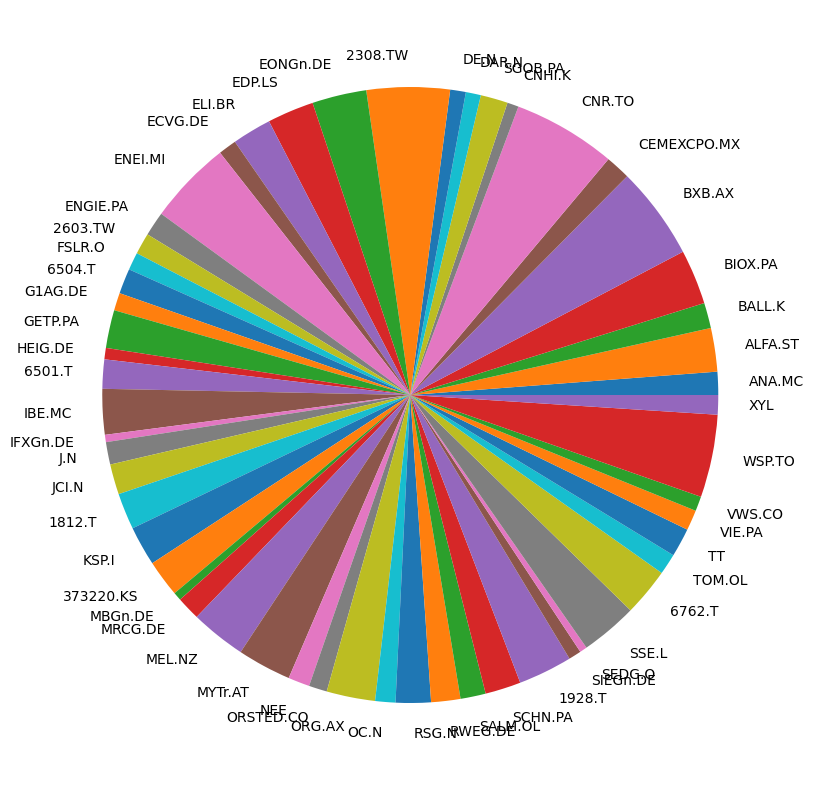

In [17]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [18]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 17.0%
Annual volatility: 8.1%
Sharpe Ratio: 1.86


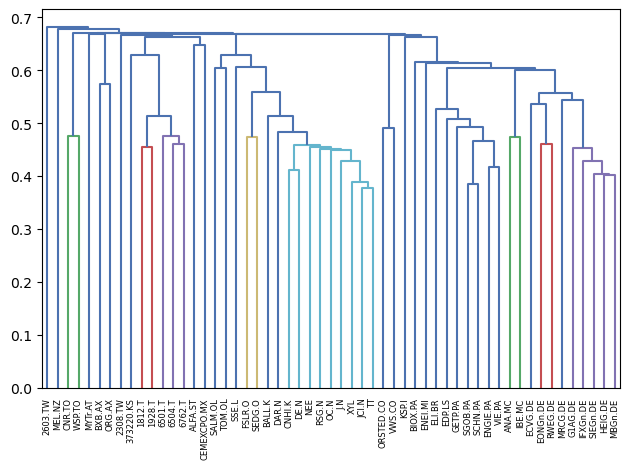

In [19]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp); 

In [20]:
prices.tail()

,ANA.MC,ALFA.ST,BALL.K,BAYGn.DE,BIOX.PA,BXB.AX,CEMEXCPO.MX,CNR.TO,CNHI.K,SGOB.PA,...,SEDG.O,SSE.L,6762.T,TOM.OL,TT,UPMEUR.xbo,VIE.PA,VWS.CO,WSP.TO,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-29,133.30,36.3098,52.1203,33.630,100.60,8.3922,0.7066,113.94125,11.0366,66.66,...,93.60,1856.0,43.0484,11.0370,221.0040,34.42,28.56,28.7499,127.06964,103.6245
2024-01-02,131.70,35.2416,52.0508,34.325,100.70,8.4353,0.6980,114.63567,11.1081,66.18,...,91.70,1838.0,42.8937,10.3780,219.8136,34.34,28.40,28.1104,125.53148,103.8367
2024-01-03,127.20,34.5010,51.1400,34.405,99.36,8.4290,0.6829,114.57324,10.9422,64.02,...,86.44,1830.0,43.1479,9.7762,216.0608,34.07,28.27,27.1377,125.25706,102.1518
2024-01-04,128.05,34.5583,51.7683,35.235,99.50,8.4065,0.6807,115.05843,10.8745,64.61,...,82.80,1846.0,41.4261,10.2291,219.0350,34.47,28.84,27.3029,126.51293,102.6501
2024-01-05,126.75,34.1369,52.4541,35.220,97.94,8.3874,0.7045,115.08024,11.0228,63.77,...,79.58,1858.0,40.9954,10.2605,219.8702,34.77,28.85,27.4257,125.16960,102.5043


In [21]:
prices.head()

,ANA.MC,ALFA.ST,BALL.K,BAYGn.DE,BIOX.PA,BXB.AX,CEMEXCPO.MX,CNR.TO,CNHI.K,SGOB.PA,...,SEDG.O,SSE.L,6762.T,TOM.OL,TT,UPMEUR.xbo,VIE.PA,VWS.CO,WSP.TO,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-07,77.14,NaN,NaN,NaN,58.6,NaN,NaN,NaN,NaN,29.84,...,NaN,NaN,NaN,NaN,NaN,NaN,17.4515,NaN,NaN,NaN
2019-01-08,78.24,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,29.60,...,NaN,NaN,NaN,NaN,NaN,NaN,17.5961,NaN,NaN,NaN
2019-01-09,77.64,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,28.89,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0851,NaN,NaN,NaN
2019-01-10,78.74,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,28.77,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0803,NaN,NaN,NaN
2019-01-11,79.08,NaN,NaN,NaN,58.5,NaN,NaN,NaN,NaN,28.81,...,NaN,NaN,NaN,NaN,NaN,NaN,17.1671,NaN,NaN,NaN


In [22]:
prices.index = pd.to_datetime(prices.index)

In [23]:
prices_filled = prices.bfill()

In [24]:
prices_filled.head()

,ANA.MC,ALFA.ST,BALL.K,BAYGn.DE,BIOX.PA,BXB.AX,CEMEXCPO.MX,CNR.TO,CNHI.K,SGOB.PA,...,SEDG.O,SSE.L,6762.T,TOM.OL,TT,UPMEUR.xbo,VIE.PA,VWS.CO,WSP.TO,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-07,77.14,19.0189,40.4741,63.87,58.6,6.1655,0.4454,67.51517,7.1931,29.84,...,35.01,1055.0,20.0712,10.3967,62.2906,22.89,17.4515,13.2376,38.53609,57.4778
2019-01-08,78.24,19.0189,40.4741,63.87,59.0,6.1655,0.4454,67.51517,7.1931,29.60,...,35.01,1055.0,20.0712,10.3967,62.2906,22.89,17.5961,13.2376,38.53609,57.4778
2019-01-09,77.64,19.0189,40.4741,63.87,58.0,6.1655,0.4454,67.51517,7.1931,28.89,...,35.01,1055.0,20.0712,10.3967,62.2906,22.89,17.0851,13.2376,38.53609,57.4778
2019-01-10,78.74,19.0189,40.4741,63.87,58.0,6.1655,0.4454,67.51517,7.1931,28.77,...,35.01,1055.0,20.0712,10.3967,62.2906,22.89,17.0803,13.2376,38.53609,57.4778
2019-01-11,79.08,19.0189,40.4741,63.87,58.5,6.1655,0.4454,67.51517,7.1931,28.81,...,35.01,1055.0,20.0712,10.3967,62.2906,22.89,17.1671,13.2376,38.53609,57.4778


In [25]:
from empyrial import empyrial, Engine

In [26]:
prices_filled=prices_filled.drop(columns=["UPMEUR.xbo","BAYGn.DE"])

In [27]:
columns_list=prices_filled.columns.tolist()

In [28]:
columns_list

['ANA.MC',
 'ALFA.ST',
 'BALL.K',
 'BIOX.PA',
 'BXB.AX',
 'CEMEXCPO.MX',
 'CNR.TO',
 'CNHI.K',
 'SGOB.PA',
 'DAR.N',
 'DE.N',
 '2308.TW',
 'EONGn.DE',
 'EDP.LS',
 'ELI.BR',
 'ECVG.DE',
 'ENEI.MI',
 'ENGIE.PA',
 '2603.TW',
 'FSLR.O',
 '6504.T',
 'G1AG.DE',
 'GETP.PA',
 'HEIG.DE',
 '6501.T',
 'IBE.MC',
 'IFXGn.DE',
 'J.N',
 'JCI.N',
 '1812.T',
 'KSP.I',
 '373220.KS',
 'MBGn.DE',
 'MRCG.DE',
 'MEL.NZ',
 'MYTr.AT',
 'NEE',
 'ORSTED.CO',
 'ORG.AX',
 'OC.N',
 'RSG.N',
 'RWEG.DE',
 'SALM.OL',
 'SCHN.PA',
 '1928.T',
 'SIEGn.DE',
 'SEDG.O',
 'SSE.L',
 '6762.T',
 'TOM.OL',
 'TT',
 'VIE.PA',
 'VWS.CO',
 'WSP.TO',
 'XYL']

In [29]:
prices_filled.index = pd.to_datetime(prices_filled.index)

Start date: 2019-01-07
End date: 2024-01-14


,Backtest
,
Annual return,14.36%
Cumulative return,97.71%
Annual volatility,8.58 %
Winning day ratio,57.89%
Sharpe ratio,1.61
Calmar ratio,0.46
Information ratio,0.0
Stability,0.83
Max Drawdown,-21.47 %


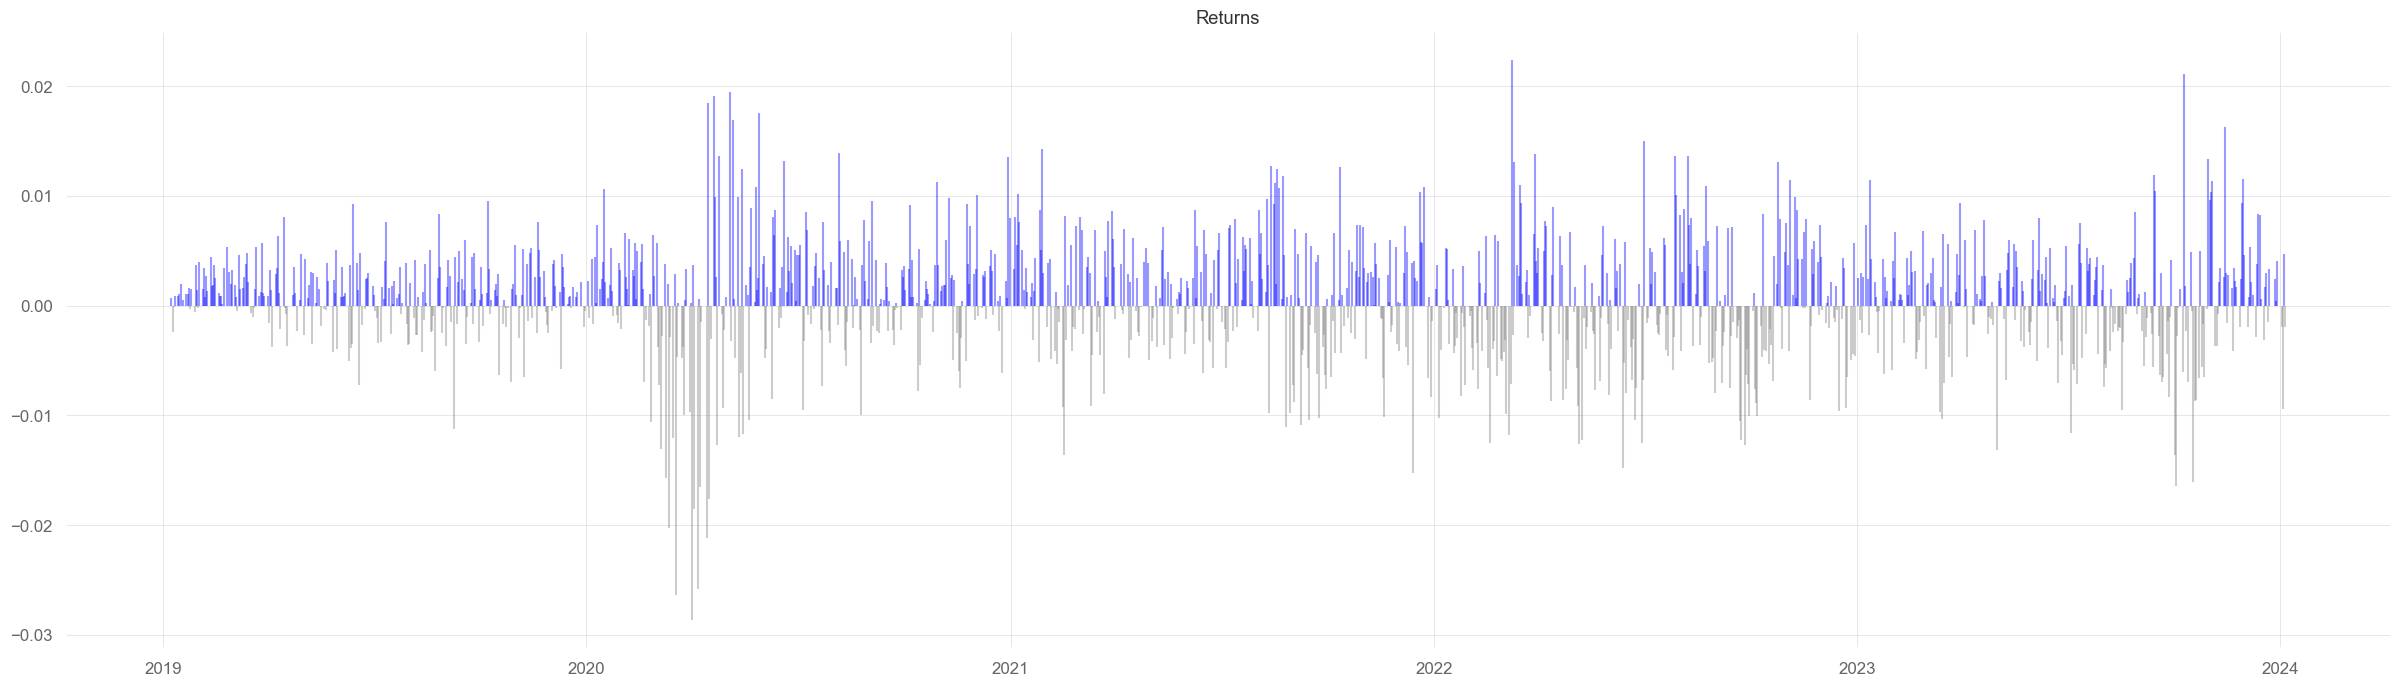

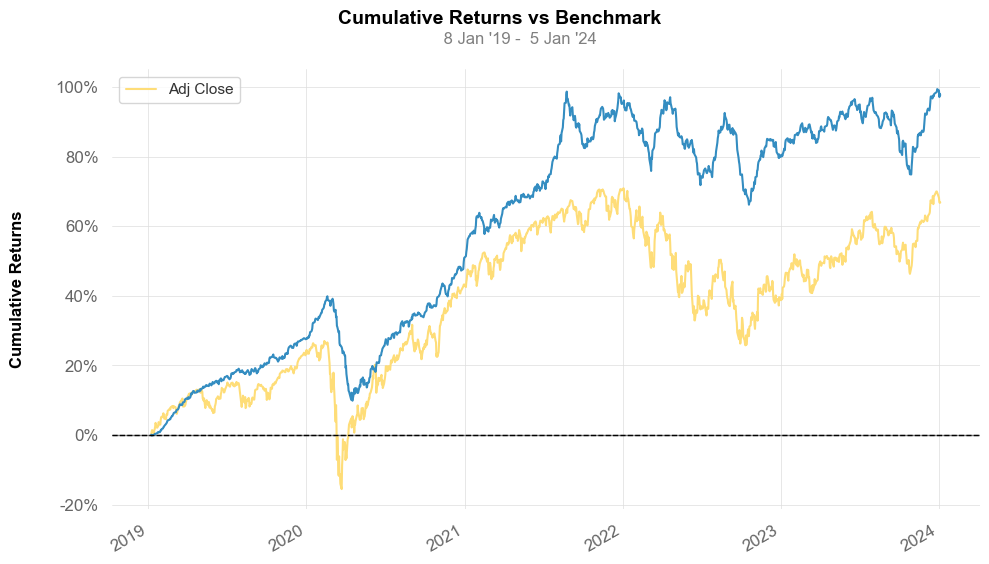

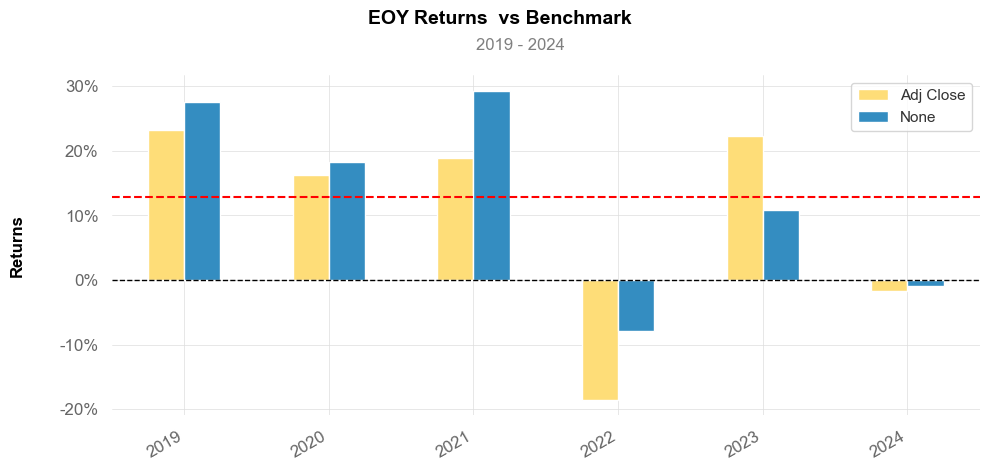

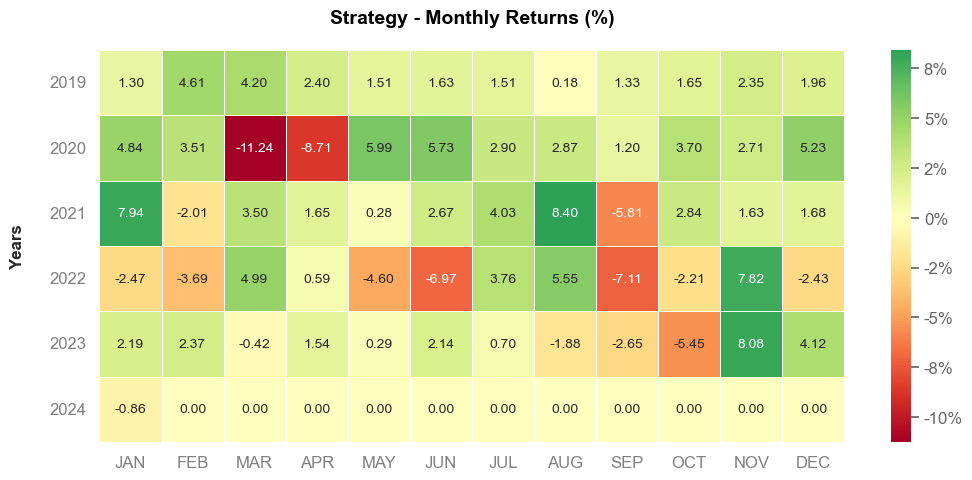

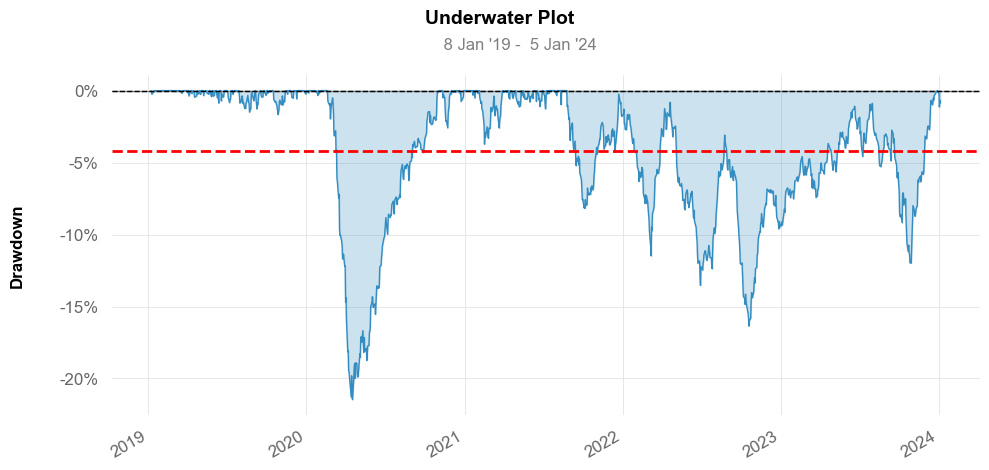

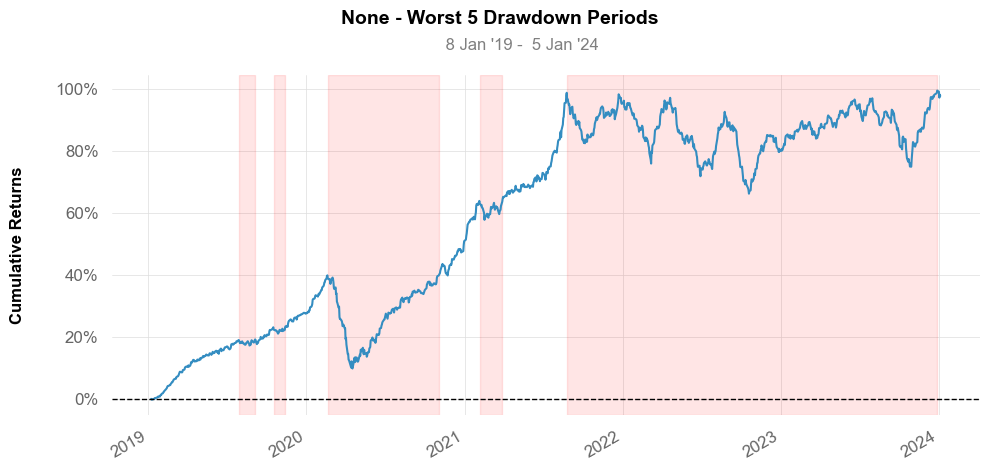

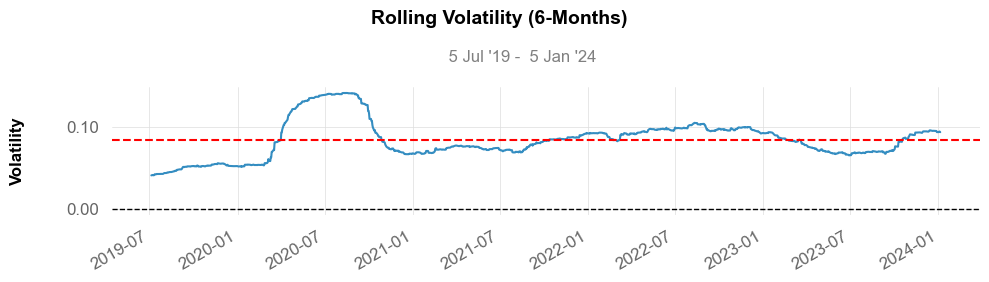

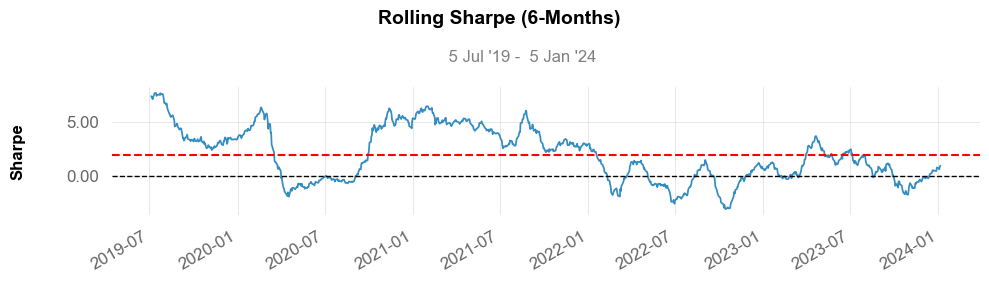

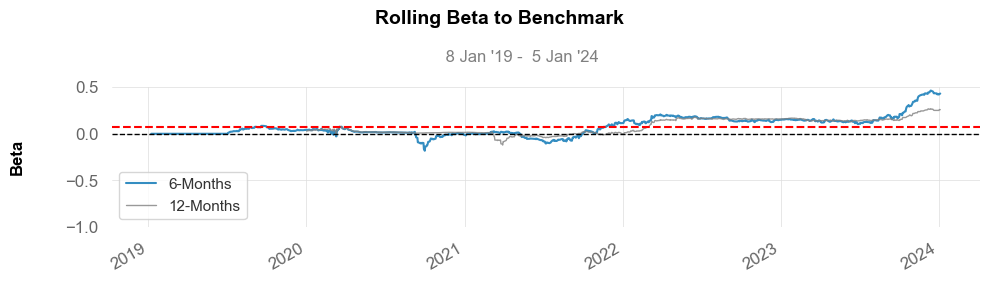

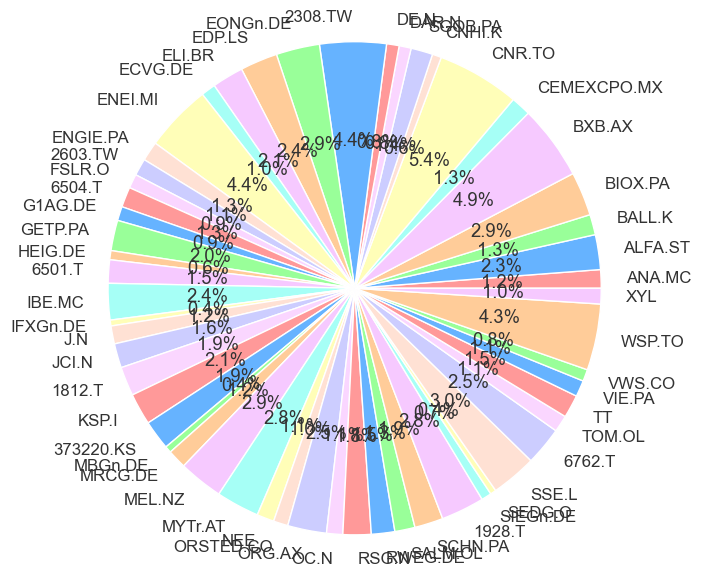

In [30]:
portfolio = Engine(
      start_date = "2019-01-07",
      benchmark = ["ACWI"],
      portfolio = columns_list,
      weights = [0.0121,
0.02283,
0.01332,
0.02873,
0.0487,
0.0131,
0.05412,
0.00599,
0.01431,
0.00789,
0.0082,
0.04358,
0.02851,
0.02446,
0.02059,
0.00952,
0.04395,
0.0128,
0.0112,
0.00925,
0.01323,
0.00924,
0.01994,
0.00596,
0.01527,
0.02387,
0.00383,
0.01177,
0.0159,
0.01907,
0.02073,
0.01932,
0.00435,
0.01241,
0.02913,
0.02827,
0.01129,
0.00955,
0.02548,
0.01061,
0.01842,
0.01533,
0.01325,
0.01874,
0.02837,
0.00661,
0.00383,
0.02987,
0.02518,
0.01097,
0.01506,
0.01067,
0.00772,
0.0434,
0.01021,
],
    data=prices_filled
)
empyrial(portfolio)